# Weekly Assignment 4: Machine Learning
**IBM HR Analytics Employee Attrition & Performance** 
<br>Predict attrition of your valuable employees

Duc Thien Vu
<br>18-05-2021
<br>Data Learning

In this assignment, I am going to apply what I have learned about machine learning to a dataset of my choice on Kaggle. Kaggle is an online platform where data scientists can find datasets and enter competitions to predict certain outcomes. In these competitions, Kaggle users can download data and create their model.

**Objective** 
<br>Predict the variable 'Attrition' in the 'Employee Attrition' dataset, using Random Forest.

In [22]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing the data
Firstly, let's have a look at the dataset I chose: **Employee Attrition** - Predict the variable attrition.
I chose this dataset, because I have worked with a similiar dataset for Project 1 and would like to know even more about this topic.

**What does Employee Attrition actually mean?** 
<br>According to McQuerrey (2019) is attrition the normal life cycle of employment. Employees who move, retire, pass away or leave the company to raise a family or attend school represent the usual ebb and flow of staffers through a business. In other words, when it comes to attrition, employees are leaving not because they have a problem with your company or their jobs – it’s a matter of life unfolding. Attrition tends to be higher in companies located in transient cities and in organizations that hire older employees as a matter of practice.

In [2]:
#Importing csv file to pandas df
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


This DF consists of a number of variables which as exactly the same as described on Kaggle. As can be seen in the DF above, this DF exists out of (int) and (str). We are predicting 'Attrition': the loss of employees through a natural process (yes) or not (no).

In [3]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

As can be seen above, a much smaller part of the employees quit through a natural process. 83,8% is genuine, so it will be more difficult to determine employees who did not quit through a natural process then people who did.

Below we will drop the variables we do not need, get our X and y and split the data.

In [4]:
df.drop(df.columns.difference(['Age','Attrition', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction' ]), 1, inplace=True)
df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction
0,41,Yes,1,2,2,3,2,4
1,49,No,8,1,3,2,2,2
2,37,Yes,2,2,4,2,1,3
3,33,No,3,4,4,3,1,3
4,27,No,2,1,1,3,1,2


In [25]:
X = df.loc[:, df.columns != 'Attrition'] #This is to get all the columns variables with a strong predictive value
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training the algorithm

In this part we will train the Random Forest algorithm. According to Jonas (2021) 'RF uses randomness, so we need to set a random_state if we want the result to be stable for presentation purposes.'

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [24]:
rf.score(X_test,y_test)

0.8253968253968254

## Evaluating the model
To evaluate the model, standard approach for a classification problem is used, meaning making a confusion matrix and calculating accurancy, precision and recall.

In this confusion matrix sorted labels are used, 0 comes first and 1 second.

In [8]:
rf.classes_

array(['No', 'Yes'], dtype=object)

In [10]:
y_pred = rf.predict(X_test) #The predicted values
cm = confusion_matrix(y_test, y_pred) #Creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['no attrition (actual)', 'attrition (actual)'], columns = ['no attrition (pred)', 'attrition (pred)']) #Label and make df
cm

,no attrition (pred),attrition (pred)
no attrition (actual),355,9
attrition (actual),68,9


In [11]:
9/18

0.5

As the confusion matrix shows, Employee Attrition is not determined very well. The next step is using a function called classification_report.

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.98      0.90       364
         Yes       0.50      0.12      0.19        77

    accuracy                           0.83       441
   macro avg       0.67      0.55      0.55       441
weighted avg       0.78      0.83      0.78       441



The precision for Employee Attrition is not very precise at all (not close to 1). About 50% of the employees who did quit through a natural process, actually did not.

## Different parameters
**NOTE This is not possible with my dataset?**

In [18]:
rf_new  = RandomForestClassifier(n_estimators = 1, max_features = 30, random_state=1) 
rf_new = rf_new.fit(X_train, y_train)
y_pred_new = rf_new.predict(X_test) #The predicted values
print(classification_report(y_test, y_pred_new))

ValueError: max_features must be in (0, n_features]

**NOTE This is not possible with my dataset?**

## Making use of probabilities
Algorithm classifies cases according to probability. The standard setting is to select the outcome with the highest probability.

Probabilities can be used by using predict_proba. Herewith the RF model is used again. 

In [19]:
y_pred_prob = rf.predict_proba(X_test) #Instead of classes, the probabilities will be shown
y_pred_prob

array([[0.8 , 0.2 ],
       [0.75, 0.25],
       [0.58, 0.42],
       [0.79, 0.21],
       [0.92, 0.08],
       [0.87, 0.13],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.53, 0.47],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.65, 0.35],
       [0.83, 0.17],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.85, 0.15],
       [0.83, 0.17],
       [0.91, 0.09],
       [0.95, 0.05],
       [0.63, 0.37],
       [0.81, 0.19],
       [0.82, 0.18],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.81, 0.19],
       [0.62, 0.38],
       [0.65, 0.35],
       [0.92, 0.08],
       [0.79, 0.21],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.86, 0.14],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.9 ,

The first array is often close to 1 (employees who did not quit through a natural process)? The second array is often close to 0 (employees who quit through a natural process). The next step is visualizing the probabilities. 

C:\Users\ducth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


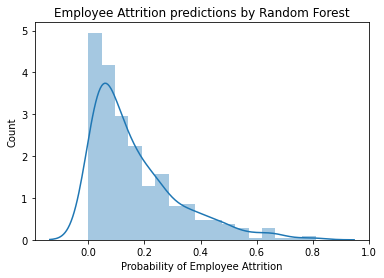

In [20]:
fraud_prob = y_pred_prob[:,1] #this subsets the second column (fraud)
sns.distplot(fraud_prob)
plt.xlabel("Probability of Employee Attrition")
plt.ylabel("Count")
plt.title("Employee Attrition predictions by Random Forest")
plt.show()